# Welcome to ProtaVision: Delving into Protein Structures and Functions🧬🔬🧪🧫🦠
---
Welcome to this interactive Jupyter Notebook! 🎉

**About This Notebook:**
This notebook is dedicated to facilitating sequence alignment, a fundamental principle in bioinformatics. Using a custom package, you can input two proteins from a dictionary and efficiently determine the number of matching amino acids, as well as identify the indices of those that do not match. Whether you're delving into bioinformatics for the first time or seeking a streamlined tool for protein analysis, this notebook provides a comprehensive solution.

**Getting Started:**
To get started, simply navigate through the sections using the table of contents provided on the ReadMe. Each section is packed with explanations, code snippets, and visualizations to help you grasp concepts effectively. 

**How to Use:**
Feel free to experiment with the code! Modify variables, tweak parameters, and run cells to see how different changes affect the outcomes. Don't hesitate to ask questions or seek clarification whenever needed.

**Additional Resources:**
If you're new to Jupyter Notebooks or need a refresher, check out the [Jupyter Notebook Documentation](https://jupyter-notebook.readthedocs.io/en/stable/) for comprehensive guidance.

**Questions?**
If you have any questions, please contact nichelle.sequeira@epfl.ch or aurelie.masson@epfl.ch

**Let's Dive In!**
Start exploring and discovering insights within this notebook. Happy coding! 🚀

🔧 First, let's import everything! 
---
Please run the following code. Here, we are going to import all dependencies and all the functions to ensure the code runs properly. If you go to functions python file, you can se that SeqIO and ExPASy are imported from the biopython package. **Bio.SeqIO** is a module from Biopython used for reading and writing sequence files in different formats, and **Bio.ExPASy**, a module that provides access to tools and databases hosted on the ExPASy server, including the Swiss-Prot database.

In [5]:
import os
import ast
import pandas as pd
import py3Dmol
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from protavision.functions import get_protein_sequence, compare_sequences, proportion_amino_acid, count_conservative_substitutions, uniprot_to_pdb, calculate_alignment_details, calculate_number_of_gaps, count_matches_with_gap, count_amino_acids

🔥Let's Get Started! 
---
Using the function, **get_protein_sequence(protein_name)**, users input the name **UniProt** of a protein  and fetch its sequence from the Swiss-Prot database using the Biopython library.

Using a Python script designed to fetch the sequence of a protein from the **UniProt** database using its name (e.g., "MYG_HUMAN").  

### Example Usage📚
If you enter MYG_HUMAN as an input, you should get the following output:
- This is the sequence of your first protein: MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG


In [6]:
protein_name1 = input("Please enter the name of the first protein (example MYG_HUMAN): ") 
sequence1 = get_protein_sequence(protein_name1) 
print(f"This is the sequence of your first protein: {sequence1}")

Please enter the name of the first protein (example MYG_HUMAN):  MYG_HUMAN


This is the sequence of your first protein: MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG


In [7]:
protein_name2 = input("Please enter the name of the second protein (example MYG_MOUSE): ")
sequence2 = get_protein_sequence(protein_name2)
print(f"This is the sequence of your second protein; {sequence2}")

Please enter the name of the second protein (example MYG_MOUSE):  MYG_MOUSE


This is the sequence of your second protein; MGLSDGEWQLVLNVWGKVEADLAGHGQEVLIGLFKTHPETLDKFDKFKNLKSEEDMKGSEDLKKHGCTVLTALGTILKKKGQHAAEIQPLAQSHATKHKIPVKYLEFISEIIIEVLKKRHSGDFGADAQGAMSKALELFRNDIAAKYKELGFQG


🚀Next Step: Let's find the differences between the two sequences!🧬
---
This code snippet compares two sequences (here sequence1 and sequence2) that were defined character by character to find their differences and displays the index, and the respective amino acids from each sequence at that index. This code can be used for comparing sequences, such as DNA or protein sequences, and identifying variations or mutations between them.

### Expected output📚
You should obtain an output giving:
- The number of amino acids that don't match
- The number of amino acids that do match
- A table showing the index of the amino acids that don't match as well as the amino acids of both sequences


In [8]:
df = compare_sequences(sequence1, sequence2)
df

The total number of amino acids that don't match is: 25
The total number of amino acids that match is: 129


,Index,Sequence 1,Sequence 2
0,21,I,L
1,22,P,A
2,31,R,G
3,35,G,T
4,41,E,D
5,48,H,N
6,53,D,E
7,54,E,D
8,57,A,G
9,66,A,C


## 💻Amino Acid Analysis and Structure Visualization

In this section, we will analyze the properties and visualize the structures of amino acids. Amino acids are the building blocks of proteins, each with unique chemical properties and structures. We will explore various characteristics such as molecular weight, hydrophobicity, and amino acid composition, as well as visualize their structures to gain insights into their functions and interactions within proteins. The proportion of each amino acid of each sequence will be visualise with a bar diagram with the help of the function **proportion_amino_acid**.

Let's start by seeing a few properties

### Molecular weight
You should be able to see the molecular weight of each amino acid sequence. To do so, you can see in the functions python file that **ProteinAnalysis** has been imported from Bio.SeqUtils.ProtParam. This is a module of the Biopython library that provides tools for calculating various physico-chemical properties of proteins from their amino acid sequence. This allow us to calculate the molecular weight of proteins.

##### Example Usage for the molecular weight:
- The molecular weight of your first amino acid sequence is: 17183.597 g/mol
- The molecular weight of your second amino acid sequence is: 17069.467 g/mol

In [9]:
analyzed_seq1 = ProteinAnalysis(str(sequence1))
analyzed_seq2 = ProteinAnalysis(str(sequence2))

molecular_weight1 = round(analyzed_seq1.molecular_weight(), 3)
molecular_weight2 = round(analyzed_seq2.molecular_weight(), 3)

print(f"The molecular weight of your first amino acid sequence is: {molecular_weight1} g/mol")
print()
print(f"The molecular weight of your second amino acid sequence is: {molecular_weight2} g/mol")

The molecular weight of your first amino acid sequence is: 17183.597 g/mol

The molecular weight of your second amino acid sequence is: 17069.467 g/mol


### Visualizing proportion of amino acid
You should be able to see the proportion of each amino acid in both sequences with a bar chart. To do so, we use the function **proportion_amino_acid** that taken for the inputs the sequences (sequence1 and sequence2) and you can see how many amino acids you have.

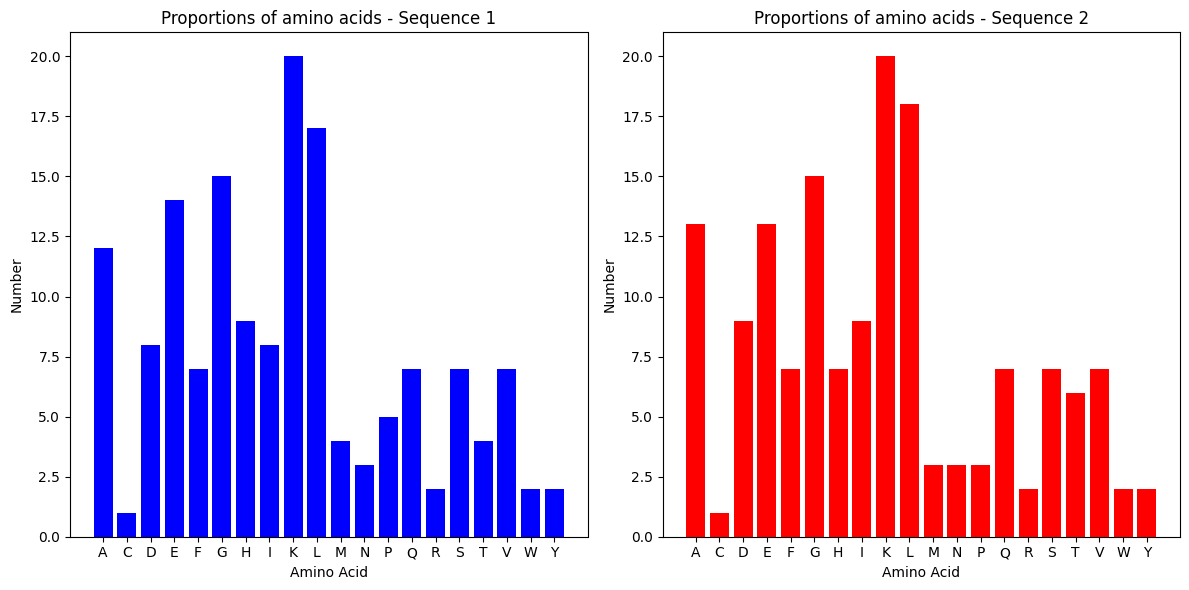

In [10]:
proportion_amino_acid(sequence1, sequence2) 

## 📝Substitutions Conservatrices in Biochemistry Amino Acids

In biochemistry, substitutions conservatrices refer to amino acid substitutions in protein sequences that preserve the physicochemical properties or functional roles of the amino acids involved. These substitutions maintain the structure and function of the protein despite alterations in the amino acid sequence.

### Characteristics:
- **Conservation of Function**: Preserves biochemical properties or functional roles.
- **Conservation of Structure**: Maintains structural integrity, especially in critical regions.
- **Functional Redundancy**: Utilizes multiple amino acids with similar roles.

### Examples📚:
- Aromatic Residues: Phenylalanine, tyrosine, and tryptophan.
- Hydrophobic Residues: Leucine, isoleucine, and valine.
- Charge Conservation: Lysine and arginine, glutamate and aspartate.

### Importance:
Understanding substitutions conservatrices predicts the effects of mutations on protein structure and function, aiding in informed hypotheses about protein behavior.

**Please make sure that your amino acid sequences are the same length to use this code, as without the same length, this code has no sense**

You should be able to get the number of conservative substitutions thanks to the function **count_conservative_substitutions**.

In [11]:
num_conserv_substitutions = count_conservative_substitutions(sequence1, sequence2)

print("The number of conservative substitutions :", num_conserv_substitutions)

The number of conservative substitutions : 18


## 🧩 Amino Acid Composition Analysis

Now let's analyze the amino acid composition of the proteins. 

First, let's analyze the **amino acid composition** 👩🏻‍🔬 of both sequences.

### 🔍 Counting Specific type of Amino Acids in Protein Sequences (hydrophobic, base...)

This Jupyter notebook code snippet counts and displays the number of different types of amino acids in given protein sequences. The steps below outline the functionality of the code:

1. **Count Amino Acids in Protein Sequences**:
    - The `count_amino_acids` function from the `functions` module is used to count the amino acids in the given protein sequences, `sequence1` and `sequence2`.
    - The counts for `sequence1` are stored in `counts_1rsprotein`.
    - The counts for `sequence2` are stored in `counts_2ndprotein`.

2. **Print Amino Acid Counts**:
    - The code prints the protein sequence `sequence1`.
    - It prints the number of hydrophobic, hydrophilic, acidic, and basic amino acids in `sequence1` using the counts stored in `counts_1rsprotein`.

### Example Usage

If the sequences and the `count_amino_acids` function are properly defined, running this code will provide a detailed breakdown of the types of amino acids in the protein sequences. This is useful for analyzing the properties of proteins based on their amino acid composition.

For a sequence "MVHLTPEEK", one would expect; 
- Number of hydrophobic amino acids: 3
- Number of hydrophilic amino acids: 1
- Number of acidic amino acids: 2 
- Number of basic amino acids: 2

In [12]:
counts_1rsprotein = count_amino_acids(sequence1)
print(f"Sequence : {sequence1}")
print("Number of hydrophobic amino acids :", counts_1rsprotein["hydrophobics"])
print("Number of hydrophilic amino acids  :", counts_1rsprotein["hydrophiles"])
print("Number of acidic amino acids :", counts_1rsprotein["acids"])
print("Number of basic amino acids  :", counts_1rsprotein["bases"])


Sequence : MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG
Number of hydrophobic amino acids : 59
Number of hydrophilic amino acids  : 22
Number of acidic amino acids : 22
Number of basic amino acids  : 31


In [13]:
counts_2ndprotein = count_amino_acids(sequence2)
print(f"Sequence : {sequence2}")
print("Number of hydrophobic amino acids :", counts_2ndprotein["hydrophobics"])
print("Number of hydrophilic amino acids  :", counts_2ndprotein["hydrophiles"])
print("Number of acidic amino acids :", counts_2ndprotein["acids"])
print("Number of basic amino acids  :", counts_2ndprotein["bases"])


Sequence : MGLSDGEWQLVLNVWGKVEADLAGHGQEVLIGLFKTHPETLDKFDKFKNLKSEEDMKGSEDLKKHGCTVLTALGTILKKKGQHAAEIQPLAQSHATKHKIPVKYLEFISEIIIEVLKKRHSGDFGADAQGAMSKALELFRNDIAAKYKELGFQG
Number of hydrophobic amino acids : 61
Number of hydrophilic amino acids  : 24
Number of acidic amino acids : 22
Number of basic amino acids  : 29


## 🎉Protein Visualization

Protein visualization is an essential aspect of structural biology and bioinformatics, allowing researchers to understand the three-dimensional structure and function of proteins. Interactive molecular visualization tools provide powerful capabilities for visualizing and analyzing protein structures directly within Jupyter Notebooks. Before to visualize the protein in 3D, we need to get the PDB name because we use a python package name py3Dmol that needs the PDB name to visualize the protein in 3D. The first part of this section consist to convert the unitprot name (as an example of form MYG_HUMAN) into PDB name (example : 3RGK).

### Expected Output📚
You should be able to see the protein structures in 3D and be able to zoom in/out, and turn the protein around. It works by using the function named **unit_prot_to_pdb**. Please note that the code may not display the protein in 3D if it doesn't have a PDB code (this is what happens with the mouse myoglobin protein).


In [14]:
pdb_id1 = uniprot_to_pdb(protein_name1)
if pdb_id1:
    print(f"The PDB Code associated to the first protein {protein_name1} is : {pdb_id1}")
else:
    print(f"No PDB Code is associated to this first protein {protein_name1}")

pdb_id2 = uniprot_to_pdb(protein_name2)
if pdb_id2:
    print(f"The PDB code of the second protein {protein_name2} is : {pdb_id2}")
else:
    print(f"No PDB code is associated to the second protein {protein_name2}")

The PDB Code associated to the first protein MYG_HUMAN is : 3RGK
No PDB code is associated to the second protein MYG_MOUSE


In [15]:
view = py3Dmol.view(query=pdb_id1)

view.setStyle({'cartoon':{'color':'spectrum'}})

view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
view = py3Dmol.view(query=pdb_id2)

view.setStyle({'cartoon':{'color':'spectrum'}})

view



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 💡Gap Method for Sequence Alignment

Now let's move onto using the Gap Method. This code implements a simple sequence alignment method using a gap. Sequence alignment is a fundamental task in bioinformatics used to identify regions of similarity between DNA, RNA, or protein sequences.

### Explanation:
This code is useful for aligning and comparing sequences to identify similarities and differences between them. The Needleman-Wunsch algorithm ensures optimal global alignment, considering all possible alignments to maximize similarity.

### What is the Needleman-Wunsch algorithm?
The Needleman-Wunsch algorithm is a dynamic programming algorithm used for global pairwise sequence alignment. It compares two sequences by optimizing a scoring scheme that rewards matches and penalizes mismatches and gaps. By considering all possible alignments and choosing the one with the highest score, it identifies the optimal alignment, providing insights into the evolutionary relationships and functional similarities between the sequences.

### Example Output📚
For sequences defined as: 
- sequence1 = MYG_HUMAN
- sequence2 = MYG_MOUSE

One would obtain the following as output:
  - Sequence 1 aligned: MGLSDGEWQLVLNVWGKVEADIP--GHGQEVLIR-LFKG-HPETLE-KFDKFKH-LKSEDE-MKA-SEDLKKHGA-TVLTALGG-ILKKKGH-HEA-EIK-PLAQSHATKHKIPVKYLEFISECIIQ--VLQSK--HP-GDFGADAQGAMN-KALELFRK-DM-ASN--YKELGFQG
  - Sequence 2 aligned: MGLSDGEWQLVLNVWGKVEAD--LAGHGQEVLI-GLFK-THPETL-DKFDKFK-NLKSE-EDMK-GSEDLKKHG-CTVLTAL-GTILKKKG-QH-AAEI-QPLAQSHATKHKIPVKYLEFISE-II-IEVL--KKRH-SGDFGADAQGAM-SKALELFR-ND-IA--AKYKELGFQG
  - Number of matches: 131
  - Score: 735
  - Number of gaps in Sequence 1: 23
  - Number of gaps in Sequence 2: 23

Thanks to the **calculate_alignement_details** function, this displays the sequences of the two proteins with their gaps. The score is calculated by using the number of gaps of the protein with the function **calculate_number_of_gaps**. You should realize that the number of amino acids that match is bigger than before (example of myoglobine human and mouse : without introduction of gaps, the number of matches was equal to 129 and with gaps is about 131).

In [17]:
sequence1_aligned, sequence2_aligned, begin, end, num_matches = calculate_alignment_details(sequence1, sequence2)
num_gaps_sequence1 = calculate_number_of_gaps(sequence1_aligned, sequence1)
num_gaps_sequence2 = calculate_number_of_gaps(sequence2_aligned, sequence2)
score = 10*num_matches - 25*num_gaps_sequence1

print("Sequence 1 aligned:", sequence1_aligned)
print("Sequence 2 aligned:", sequence2_aligned)
print("Number of matches:", num_matches)
print("Score:", score)
print("Number of gaps in Sequence 1:", num_gaps_sequence1)
print("Number of gaps in Sequence 2:", num_gaps_sequence2)


Sequence 1 aligned: MGLSDGEWQLVLNVWGKVEADIP--GHGQEVLIR-LFKG-HPETLE-KFDKFKH-LKSEDE-MKA-SEDLKKHGA-TVLTALGG-ILKKKGH-HEA-EIK-PLAQSHATKHKIPVKYLEFISECIIQ--VLQSK--HP-GDFGADAQGAMN-KALELFRK-DM-ASN--YKELGFQG
Sequence 2 aligned: MGLSDGEWQLVLNVWGKVEAD--LAGHGQEVLI-GLFK-THPETL-DKFDKFK-NLKSE-EDMK-GSEDLKKHG-CTVLTAL-GTILKKKG-QH-AAEI-QPLAQSHATKHKIPVKYLEFISE-II-IEVL--KKRH-SGDFGADAQGAM-SKALELFR-ND-IA--AKYKELGFQG
Number of matches: 131
Score: 735
Number of gaps in Sequence 1: 23
Number of gaps in Sequence 2: 23


## 🧠 Gap Method for Sequence Alignment - Your Turn!

Now it's your turn to determine what gap size and where you want to add your gap! You should realize here that is hard to know where to introduce a gap and the length because it will be change completely the match of amino acids.

### Example Output📚
For sequences defined as: 
- sequence1 = MYG_HUMAN
- sequence2 = MYG_MOUSE

if you try :
- **gap_length = 2**
- **position = 2**
you get **num_matches=10**


You can now observe that if you do not have any information regarding the position and length of the gap you wish to introduce, it will be exceedingly difficult to achieve a significant number of matches. In this example, we have seen the number of amino acid matches decrease from 129 to 10 due to the introduction of this gap. Using the Needleman-Wunsch algorithm is highly effective and imperative when aiming to achieve maximal alignment.

In [19]:
gap_length = int(input("Enter the length of the gap: "))
position = int(input("Enter the position to apply the gap: "))

num_matches = count_matches_with_gap(sequence1, sequence2, gap_length, position)
print("Number of matches found with the gap method is:", num_matches)

Enter the length of the gap:  2
Enter the position to apply the gap:  2


Number of matches found with the gap method is: 10


# ProtaVision: Challenges and Features - General Remarks

## Introduction

Protavision is an interactive Jupyter Notebook dedicated to exploring protein structures and functions!

## Motivations
This package is useful for the students taking or interested by the biochemistry course. One can analyse 2 sequences, find the best method to get the more matches (sequence allignment and gaps). One can also try to see which secondary structure (alpha helices, beta structures, etc...) are present in the protein by visualizing the proteins in three dimensions. 

## Main Features

- **Sequence Alignment**: Efficiently compare two protein sequences to identify matching and non-matching amino acids.
- **Amino Acid Analysis**: Analyze properties of amino acids, such as molecular weight and composition.
- **Substitutions Conservatrices**: Explore amino acid substitutions that preserve biochemical properties.
- **Protein Visualization**: Visualize protein structures in 3D using PDB codes.
- **Gap Method for Sequence Alignment**: Implement a gap-based sequence alignment method.

## Challenges Encountered

1. **PDB Retrieval**: Finding PDB codes for protein visualization posed a challenge, especially for proteins with no assigned PDB codes (as myoglobin for mouse for example).
2. **Sequence Alignment**: Writing code for sequence alignment, especially implementing the Needleman-Wunsch algorithm, required careful consideration and debugging.
3. **Package Compatibility**: Ensuring compatibility between different Python packages used in the notebook, such as Biopython and py3Dmol, sometimes resulted in compatibility issues.
4. **User Input Handling**: Handling user input for gap-based sequence alignment involves validating inputs and error handling to ensure smooth execution.
5. **Using GitHub and handling conflicts**: We were having issues working on the notebook together and learning how to use multiple features such as pushing and pulling edits, dealing with environments and packages, dealing with README for the table of contents (links were not working)

## Tools Used

- **Biopython**: Utilized for retrieving protein sequences from the UniProt database and performing sequence alignment.
- **py3Dmol**: Used for visualizing protein structures in 3D within Jupyter Notebook.
- **Jupyter Notebook**: Provided an interactive environment for running code, visualizing data, and documenting the analysis process.
- **pandas**: Used for visualizing in a table index and types of amino acids that don't match between 2 sequences.
- **matplotlib**: Used to draw a bar graph to show how many amino acids we have for each.

## Conclusion

ProtaVision offers a comprehensive toolkit for exploring protein structures and functions, and overcoming challenges in sequence alignment, visualization, and analysis. With its intuitive interface and powerful functionalities, it serves as a valuable resource for bioinformatics enthusiasts and researchers alike.
